In [2]:
import pandas as pd
from polyline import line_segment_into_polygon_band

In [3]:
line_segment = [(1, 1), (2, 3.5)]

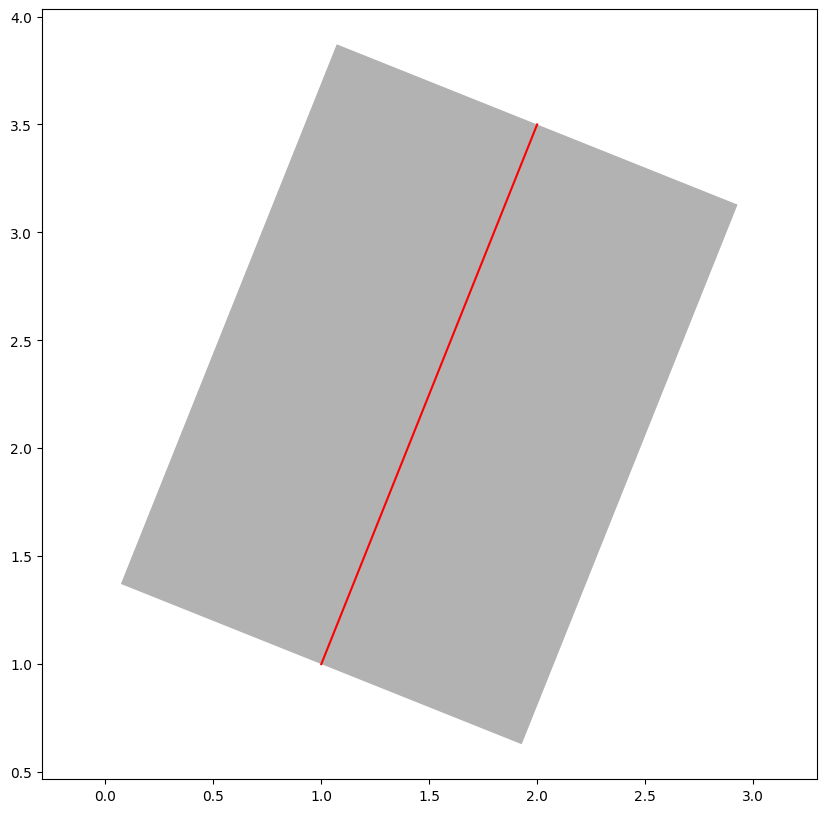

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

points = line_segment_into_polygon_band(line_segment, band_width=1)


polygon = Polygon(np.array(points), alpha=0.3, facecolor="k")
fig,ax = plt.subplots(figsize=(10, 10))
ax.add_patch(polygon)
ax.axis('equal')

(x1, y1), (x2, y2) = line_segment
ax.plot((x1, x2), (y1, y2), 'r-')

In [5]:
df = pd.read_json("links.json")

In [19]:
from shapely import Polygon, Point

def polyline_to_line_segments(polyline):
    segments = []
    for i in range(0, len(polyline) - 1):
        coord1, coord2 = polyline[i], polyline[i+1]
        segments.append((coord1, coord2))
    return segments
    
def polyline_to_band_polygons(polyline):
    segments = polyline_to_line_segments(polyline)
    polygons = []
    for seg in segments:
        polygon = line_segment_into_polygon_band(seg, band_width=0.0001)
        polygon = Polygon(polygon)
        polygons.append(polygon)
    return polygons
    
df['band_polygon'] = df['polyline'].apply(polyline_to_band_polygons)

In [20]:
df

,orig_id,orig_location,link_id,polyline,capacity,length,num_lanes,speed_limit,road_type,dest_id,dest_location,band_polygon
0,1044,"[144.9594149631, -37.7846958144]",db864ee5-da16-4ef6-b0b1-daf4640a5fe8,"[[144.9595515, -37.7847724], [144.9595451, -37...",365.516795,574.688133,1,60.0,primary,4384,"[144.958773562, -37.7898484547]",[POLYGON ((144.95965099117177 -37.784782475055...
1,1044,"[144.9594149631, -37.7846958144]",eb762842-8cfa-451d-bcc5-792edcc79b90,"[[144.959453, -37.7847628], [144.9594443, -37....",365.516795,574.688133,1,60.0,primary,4384,"[144.958773562, -37.7898484547]",[POLYGON ((144.95955223215586 -37.784775168477...
2,1044,"[144.9594149631, -37.7846958144]",66370a35-abc9-454e-8a0c-fc64fc3bd7d1,"[[144.9593377, -37.7846573], [144.9593485, -37...",517.132086,295.819894,1,60.0,primary,1046,"[144.9597377296, -37.7820429266]",[POLYGON ((144.9592385145057 -37.7846445627426...
3,1044,"[144.9594149631, -37.7846958144]",9019edd9-3401-4620-965b-9e76f4dc776e,"[[144.9592261, -37.7846481], [144.959236, -37....",517.132086,295.819894,1,60.0,primary,1046,"[144.9597377296, -37.7820429266]",[POLYGON ((144.95912684774947 -37.784635893822...
4,1046,"[144.9597377296, -37.7820429266]",773f7adf-296b-41e7-9086-da97521ba353,"[[144.9599227, -37.7818557], [144.9598445, -37...",350.199705,295.819894,1,60.0,primary,1044,"[144.9594149631, -37.7846958144]",[POLYGON ((144.9600219768195 -37.7818677047120...
...,...,...,...,...,...,...,...,...,...,...,...,...
2113,4657,None,f22f18f6-ea4d-4e5a-8f38-2b8285b9323c,"[[144.998753099, -37.7706808998], [144.9987400...",975.516194,672.473423,1,40.0,secondary,4681,"[144.9975607563, -37.7765369432]",[POLYGON ((144.99885107940588 -37.770700895801...
2114,3437,None,b1fcfd04-e068-463c-8fa7-fa9de3571e6a,"[[144.9056632079, -37.7841367268], [144.905706...",976.334343,1647.592364,1,60.0,secondary,1002,"[144.9136004101, -37.7793602323]",[POLYGON ((144.90558136881216 -37.784079260603...
2115,2514,None,61affdaf-0b81-47d6-b6ee-0b3c8c188353,"[[144.8700008, -37.811118], [144.8700809, -37....",1100.834269,1707.536950,1,50.0,secondary,3775,"[144.880012471, -37.8124280374]",[POLYGON ((144.87005251645635 -37.811032411401...
2116,2602,None,e8d726e4-86b3-4ead-b699-3ed15f166cf6,"[[144.8935253244, -37.792391064], [144.8936490...",828.330698,549.038363,1,60.0,tertiary,2505,"[144.8969587103, -37.7964658543]",[POLYGON ((144.8935998118427 -37.7923243435317...


In [ ]:
for i, link in df.iterrows():
    band_polygons = link.band_polygon
    def polyline_within_polygon(polyline, min_points=3):
        i = 0
        for point in polyline:
            point = Point(point)
            for polygon in band_polygons:
                if polygon.contains(point):
                    i += 1
                    if i >= min_points:
                        return True
        return False

    adjacent_links = df[df['polyline'].apply(polyline_within_polygon)]
    if len(adjacent_links) > 0:
        print("Link", link.link_id)
        print(adjacent_links.link_id)
        

Link bd5728c4-1855-42bb-8534-29db3b0a8f10
246    69a332b2-442f-4778-b91b-f35319c3b078
Name: link_id, dtype: object
Link e260ed0e-4732-47e2-8478-6527c0cefeb2
103    ca95b5ab-0f60-4c6e-b048-825c0a9d8cdb
Name: link_id, dtype: object
Link 5a7eb018-4e90-47f9-bab1-bbb34e04e99f
92    e8a31d5b-f655-4679-8e6e-e8dfbf921417
Name: link_id, dtype: object
Link 7163594e-6070-4d82-9935-9b46f8472bcc
26     7163594e-6070-4d82-9935-9b46f8472bcc
195    31444de1-a6ff-450f-a41c-2e1421ed636b
Name: link_id, dtype: object
Link 13d12e87-4de9-4d08-bab1-576118e54d50
30    21e1626f-e274-4509-be6e-0a6c5980a5a3
Name: link_id, dtype: object
Link 21e1626f-e274-4509-be6e-0a6c5980a5a3
28    13d12e87-4de9-4d08-bab1-576118e54d50
Name: link_id, dtype: object
Link d43f07c5-c379-480a-a3ce-510b2746d965
130    da1df4de-bb05-44d2-bd88-0d063f1adfef
Name: link_id, dtype: object
Link 2f2d48b8-6a02-4033-b719-f9c9212ab907
35     2f2d48b8-6a02-4033-b719-f9c9212ab907
111    b1cf785a-99ab-4691-9f98-7b57e9d4b758
Name: link_id, dtype: ob